bias =  -0.01529526048511936
rmse =  0.3035301364131978


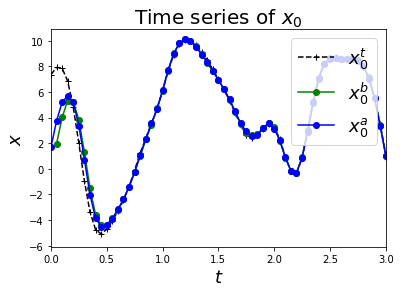

bias =  0.013908919204114266
rmse =  0.24808335549389207


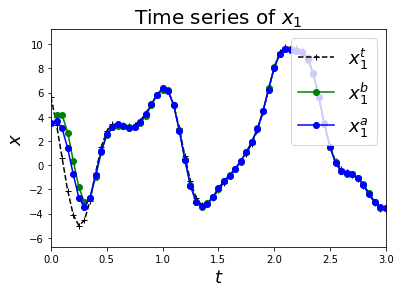

bias =  0.043778702964654304
rmse =  0.34300403630990045


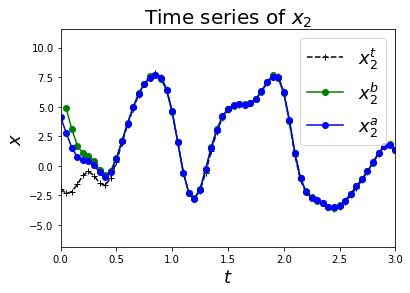

bias =  0.0016249228435248418
rmse =  0.14157815838210763


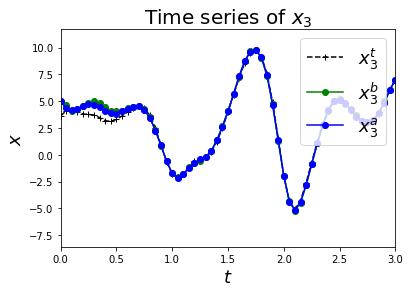

bias =  -0.011324506615723592
rmse =  0.1663600029107138


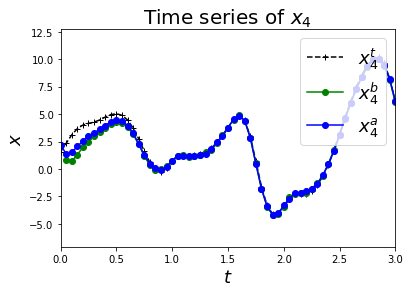

bias =  -0.0033984898805024433
rmse =  0.17134254646347757


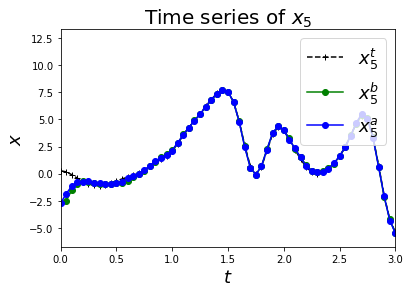

bias =  0.010185580437147424
rmse =  0.15189688526070114


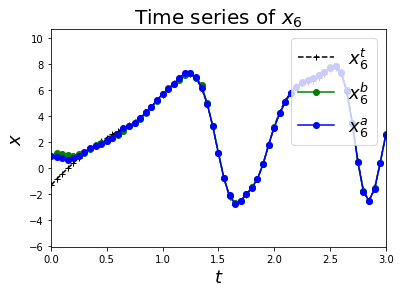

bias =  -0.0127741256263764
rmse =  0.1096752444235979


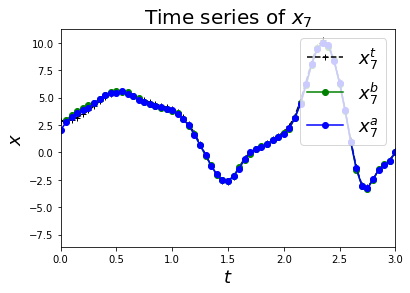

bias =  0.02555744998484767
rmse =  0.2322832405223814


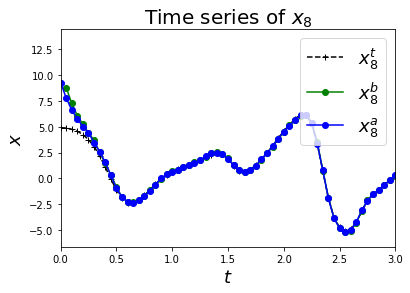

bias =  0.0011506825152670236
rmse =  0.11717888096129661


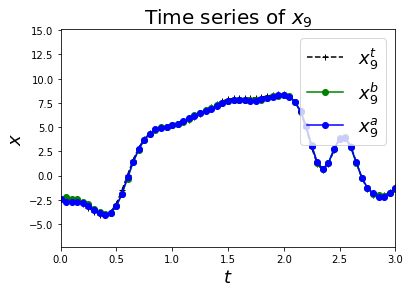

bias =  0.01918213526282923
rmse =  0.21019822071841854


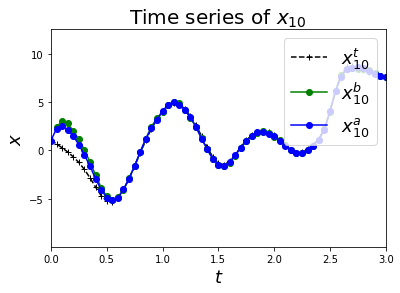

bias =  -0.04016795602238368
rmse =  0.552352263023414


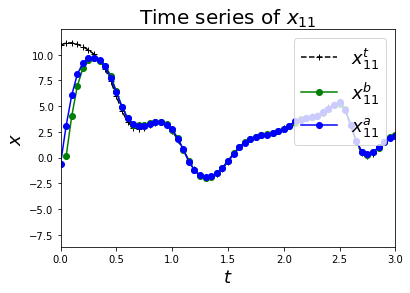

bias =  -0.016083745059697417
rmse =  0.23322650940471737


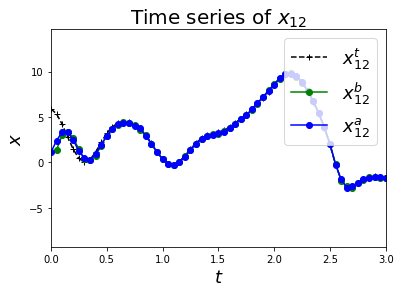

bias =  0.030651497945206174
rmse =  0.39165358614856555


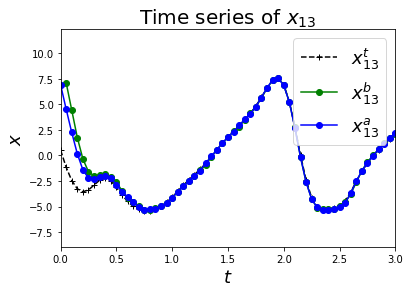

bias =  0.0002714031365951427
rmse =  0.18821022525691786


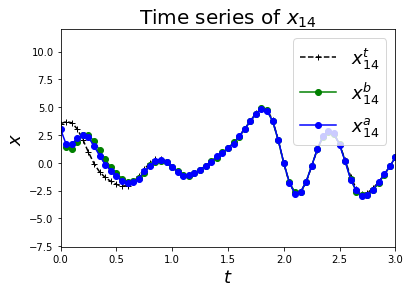

bias =  -0.05201575844342151
rmse =  0.5855574809395586


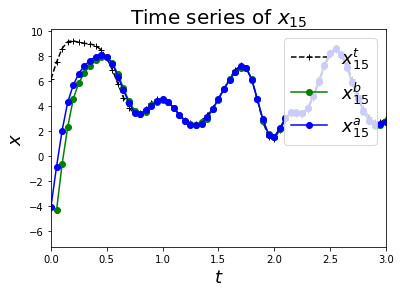

bias =  -0.017642027569323808
rmse =  0.4308027734841898


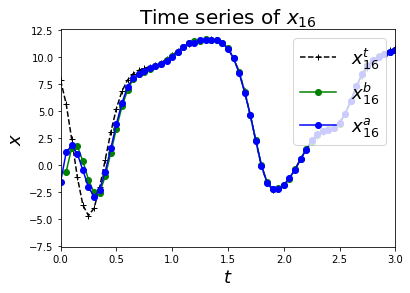

bias =  0.006457285525977887
rmse =  0.23344011104449308


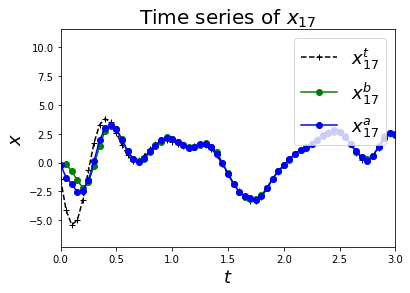

bias =  0.0036207675386418295
rmse =  0.23699000768398873


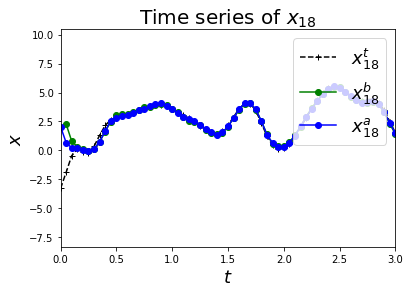

bias =  0.04114406262693201
rmse =  0.40581795248595304


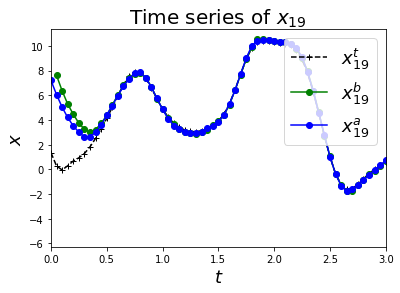

bias =  -0.019690934022683324
rmse =  0.256782282440766


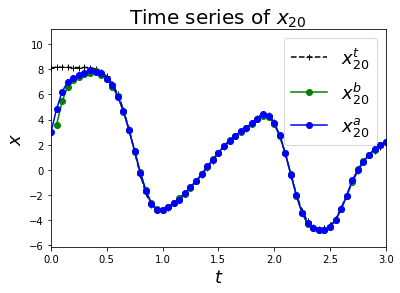

bias =  0.00839615950413064
rmse =  0.2300647442657037


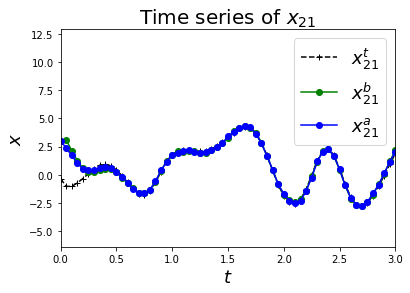

bias =  0.03106743033874026
rmse =  0.41345125803757116


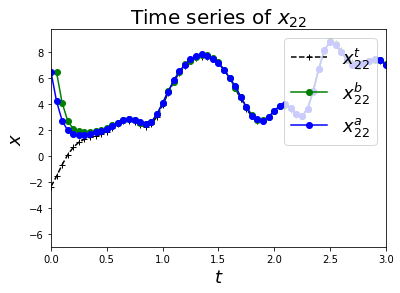

bias =  0.01941156226545661
rmse =  0.19886201993262537


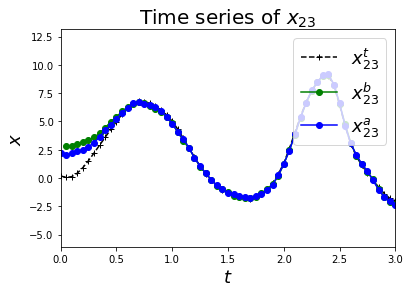

bias =  0.008533994171725713
rmse =  0.12531131042644328


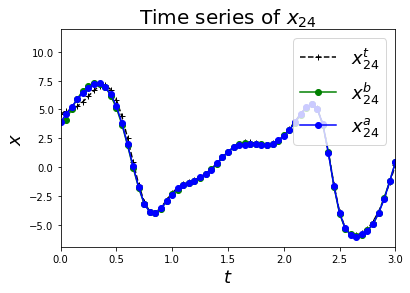

bias =  -0.02386129888114929
rmse =  0.23069262986057879


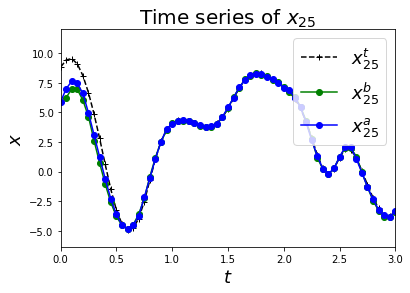

bias =  0.02180781043228186
rmse =  0.13032137912162636


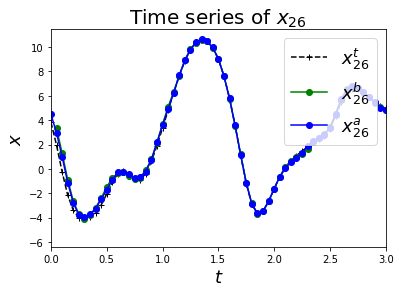

bias =  -0.007213893081163869
rmse =  0.14707367264757323


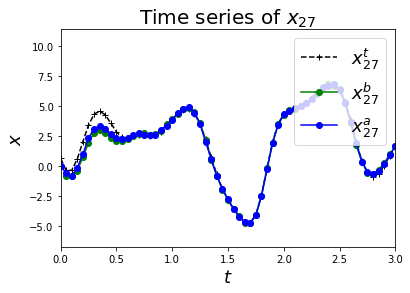

bias =  0.005097372193398752
rmse =  0.12001284504363323


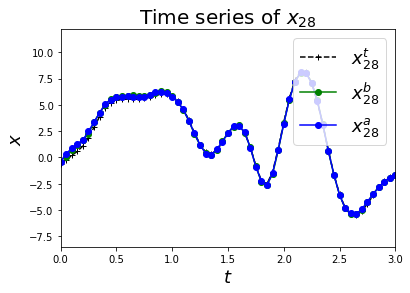

bias =  0.03438131753676765
rmse =  0.2896383646089672


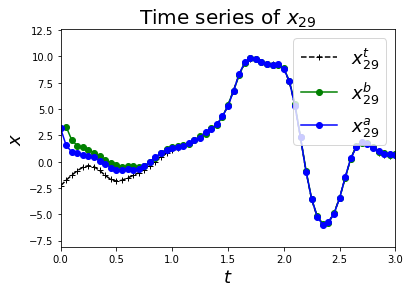

bias =  0.06370669306353341
rmse =  0.579386729293641


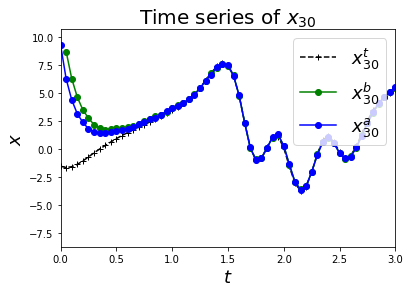

bias =  -0.03589889528241779
rmse =  0.4442281307643963


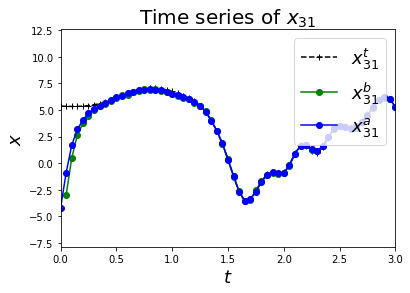

bias =  0.018051109999300208
rmse =  0.29217197274790874


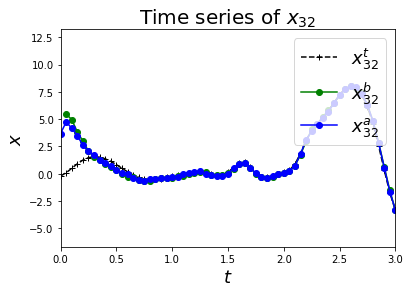

bias =  0.0213439406315933
rmse =  0.13668596504015326


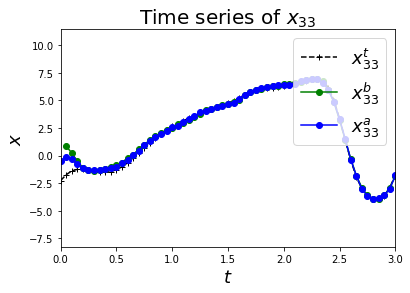

bias =  0.03408243821636339
rmse =  0.2702384406676483


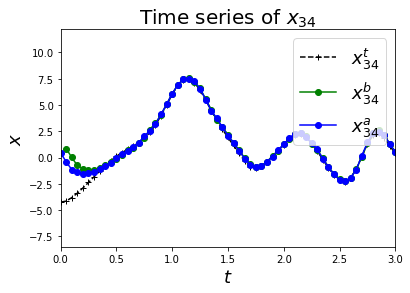

bias =  0.03365152287520511
rmse =  0.3320743238284062


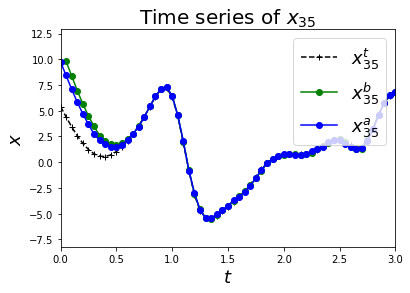

bias =  -0.014117211946432527
rmse =  0.15574501872915633


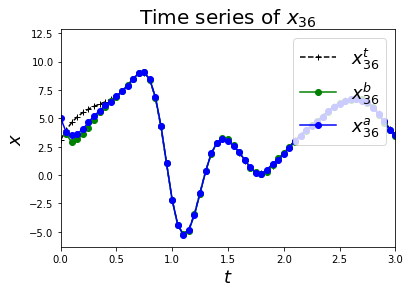

bias =  -0.01694615709811331
rmse =  0.16587242218567544


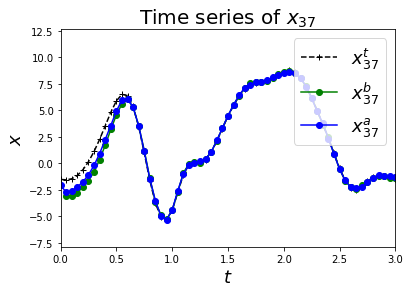

bias =  0.00731002824650619
rmse =  0.10549581672341485


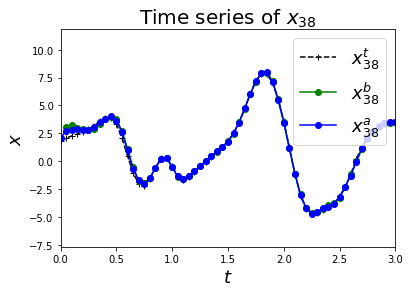

bias =  -0.02284760742029656
rmse =  0.28147613065871313


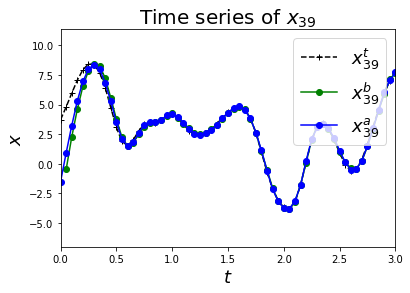

In [13]:
"""
Plot the data assimilation results
Read:
  x_t.txt
  x_b.txt
  x_a.txt
"""
import numpy as np
from settings import *
import matplotlib.pyplot as plt
N = 40

# load data
x_t_save = np.genfromtxt('x_t.txt')
x_b_save = np.genfromtxt('x_b_OI.txt')
x_a_save = np.genfromtxt('x_a_OI.txt')




# Plot time series of a single grid point
bias_v = []
rmse_v = []

for i in range(N):
    pt = i
    plt.figure()
    #print(x_a_save[:,pt-1])
    #print(x_b_save[:,pt-1])
    
    plt.plot(np.arange(nT+1) * dT, x_t_save[:,pt-1], 'k+--', label=r'$x^t_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_b_save[:,pt-1], 'go-' , label=r'$x^b_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_a_save[:,pt-1], 'bo-' , label=r'$x^a_{' + str(pt) + '}$')
    bias_i = (x_a_save[:,pt-1]-x_t_save[:,pt-1]).mean()
    print("bias = ", bias_i)
    rmse_i = np.std(x_a_save[:,pt-1]-x_t_save[:,pt-1])
    print("rmse = ", rmse_i)
    bias_v.append(bias_i)
    rmse_v.append(rmse_i)
    
    
    plt.xlabel(r'$t$', size=18)
    plt.ylabel(r'$x$', size=18)
    plt.xlim(0,3)
    plt.title(r'Time series of $x_{' + str(pt) + '}$', size=20)
    plt.legend(loc='upper right', numpoints=1, prop={'size':18})
    #plt.savefig('timeseries.png', dpi=200)
    plt.show()
    plt.close()

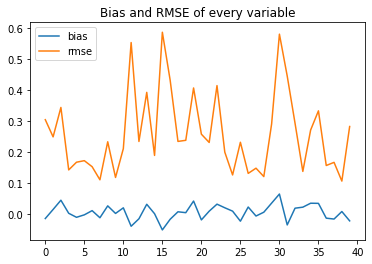

In [14]:
#per variable
#print(bias)
#print(rmse)
plt.plot(np.arange(N),bias_v, label="bias")
plt.plot(np.arange(N),rmse_v, label="rmse")
plt.legend(loc="upper left")
plt.title("Bias and RMSE of every variable")
plt.show()

In [15]:
analysis_error = x_a_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)

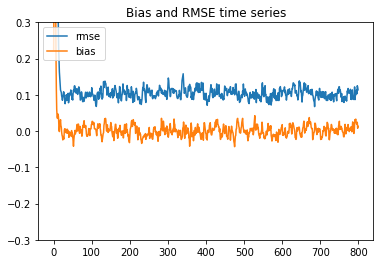

In [16]:
plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label = "bias")
plt.ylim(-0.3,0.3)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()

In [17]:
rmse = rmse_t.mean()
bias = bias_t.mean()
print(rmse)

0.12755966395519563
